In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from tensorflow.keras.preprocessing import sequence
from sklearn.model_selection import train_test_split
from nltk.sentiment import SentimentIntensityAnalyzer
from tensorflow.keras.preprocessing.text import Tokenizer
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("D:/4th year/Grad Project/Datasets/General/training.1600000.processed.noemoticon.csv", encoding = "ISO-8859-1", engine="python")
df.columns = ["label", "time", "date", "query", "username", "text"]

In [3]:
df.head()

,label,time,date,query,username,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [4]:
columns_to_drop = ['username', 'query', 'date' , 'time']
df.drop(columns=columns_to_drop, inplace=True)

In [5]:
df.head()

,label,text
0,0,is upset that he can't update his Facebook by ...
1,0,@Kenichan I dived many times for the ball. Man...
2,0,my whole body feels itchy and like its on fire
3,0,"@nationwideclass no, it's not behaving at all...."
4,0,@Kwesidei not the whole crew


In [6]:
df['label'].unique()

array([0, 4], dtype=int64)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   label   1599999 non-null  int64 
 1   text    1599999 non-null  object
dtypes: int64(1), object(1)
memory usage: 24.4+ MB


In [8]:
df.describe()

,label
count,1.599999e+06
mean,2.000001e+00
std,2.000001e+00
min,0.000000e+00
25%,0.000000e+00
50%,4.000000e+00
75%,4.000000e+00
max,4.000000e+00


In [9]:
df.isnull().sum()

label    0
text     0
dtype: int64

In [10]:
# Function to map float sentiment scores to string labels
def map_sentiment(score):
    if score == 4:
        return 'positive'
    elif score == 0:
        return 'negative'

# Apply the mapping function to the 'sentiment_score' column
df['sentiment_label'] = df['label'].apply(map_sentiment)

# Display the updated DataFrame
print(df[['label', 'sentiment_label']])


         label sentiment_label
0            0        negative
1            0        negative
2            0        negative
3            0        negative
4            0        negative
...        ...             ...
1599994      4        positive
1599995      4        positive
1599996      4        positive
1599997      4        positive
1599998      4        positive

[1599999 rows x 2 columns]


In [11]:
df.head()

,label,text,sentiment_label
0,0,is upset that he can't update his Facebook by ...,negative
1,0,@Kenichan I dived many times for the ball. Man...,negative
2,0,my whole body feels itchy and like its on fire,negative
3,0,"@nationwideclass no, it's not behaving at all....",negative
4,0,@Kwesidei not the whole crew,negative


In [12]:
# Isolate Tweet Texts
tweets = df["text"]

In [13]:
df['text']=df['text'].str.lower()

In [14]:
# Download the 'stopwords' resource
nltk.download('stopwords')

# Load the stopwords list for English
stopwords_list = stopwords.words('english')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\10\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [16]:
STOPWORDS = set(stopwords.words('english'))
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
df['text'] = df['text'].apply(lambda text: cleaning_stopwords(text))
df['text'].head()

0    upset can't update facebook texting it... migh...
1    @kenichan dived many times ball. managed save ...
2                     whole body feels itchy like fire
3    @nationwideclass no, behaving all. i'm mad. he...
4                                 @kwesidei whole crew
Name: text, dtype: object

In [17]:
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)

In [18]:
df['text']= df['text'].apply(lambda x: cleaning_punctuations(x))
df['text'].tail()

1599994                     woke up school best feeling ever
1599995    thewdbcom  cool hear old walt interviews â« h...
1599996                      ready mojo makeover ask details
1599997    happy 38th birthday boo alll time tupac amaru ...
1599998    happy charitytuesday thenspcc sparkscharity sp...
Name: text, dtype: object

In [19]:
def cleaning_repeating_char(text):
    return re.sub(r'(.)\1+', r'\1', text)

In [20]:
df['text'] = df['text'].apply(lambda x: cleaning_repeating_char(x))
df['text'].tail()

1599994                       woke up schol best feling ever
1599995    thewdbcom col hear old walt interviews â« htp...
1599996                      ready mojo makeover ask details
1599997     hapy 38th birthday bo al time tupac amaru shakur
1599998    hapy charitytuesday thenspc sparkscharity spea...
Name: text, dtype: object

In [21]:
def cleaning_email(data):
    return re.sub('@[^\s]+', ' ', data)

In [22]:
df['text']= df['text'].apply(lambda x: cleaning_email(x))
df['text'].tail()

1599994                       woke up schol best feling ever
1599995    thewdbcom col hear old walt interviews â« htp...
1599996                      ready mojo makeover ask details
1599997     hapy 38th birthday bo al time tupac amaru shakur
1599998    hapy charitytuesday thenspc sparkscharity spea...
Name: text, dtype: object

In [23]:
def cleaning_URLs(data):
    return re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',data)

In [24]:
df['text'] = df['text'].apply(lambda x: cleaning_URLs(x))
df['text'].tail()

1599994                       woke up schol best feling ever
1599995    thewdbcom col hear old walt interviews â« htp...
1599996                      ready mojo makeover ask details
1599997     hapy 38th birthday bo al time tupac amaru shakur
1599998    hapy charitytuesday thenspc sparkscharity spea...
Name: text, dtype: object

In [25]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)

In [26]:
df['text'] = df['text'].apply(lambda x: cleaning_numbers(x))
df['text'].tail()

1599994                       woke up schol best feling ever
1599995    thewdbcom col hear old walt interviews â« htp...
1599996                      ready mojo makeover ask details
1599997       hapy th birthday bo al time tupac amaru shakur
1599998    hapy charitytuesday thenspc sparkscharity spea...
Name: text, dtype: object

In [27]:
tokenizer = RegexpTokenizer(r'\w+')
df['text'] = df['text'].apply(tokenizer.tokenize)

In [28]:
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data

df['text']= df['text'].apply(lambda x: stemming_on_text(x))

In [29]:
import nltk
from nltk.stem import WordNetLemmatizer

# Download the 'wordnet' resource
nltk.download('wordnet')

# Create WordNetLemmatizer
lm = WordNetLemmatizer()

# Define lemmatizer function
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return text

# Apply lemmatizer function to the 'text' column in the 'data' DataFrame
df['text'] = df['text'].apply(lambda x: lemmatizer_on_text(x))


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\10\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [30]:
df.head()

,label,text,sentiment_label
0,0,"[upset, cant, update, facebok, texting, it, mi...",negative
1,0,"[kenichan, dived, many, time, bal, managed, sa...",negative
2,0,"[whole, body, fels, itchy, like, fire]",negative
3,0,"[nationwideclas, no, behaving, al, im, mad, he...",negative
4,0,"[kwesidei, whole, crew]",negative


In [31]:
# Assuming your CSV file has 'text' column for reviews and 'sentiment' column for labels
X = df['text']
y = df['sentiment_label']

In [32]:
max_len = 500
tok = Tokenizer(num_words=2000)
tok.fit_on_texts(X)
sequences = tok.texts_to_sequences(X)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [33]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
df.head()

,label,text,sentiment_label
0,0,"[upset, cant, update, facebok, texting, it, mi...",negative
1,0,"[kenichan, dived, many, time, bal, managed, sa...",negative
2,0,"[whole, body, fels, itchy, like, fire]",negative
3,0,"[nationwideclas, no, behaving, al, im, mad, he...",negative
4,0,"[kwesidei, whole, crew]",negative


In [35]:
# Iterate over each row and concatenate values in 'your_column' with spaces
result_list = []
for index, row in df.iterrows():
    row_values = row['text']
    result_list.append(' '.join(map(str, row_values)))

# Add the result_list as a new column in the DataFrame
df['final_clean_text'] = result_list

df.head()

,label,text,sentiment_label,final_clean_text
0,0,"[upset, cant, update, facebok, texting, it, mi...",negative,upset cant update facebok texting it might cry...
1,0,"[kenichan, dived, many, time, bal, managed, sa...",negative,kenichan dived many time bal managed save rest...
2,0,"[whole, body, fels, itchy, like, fire]",negative,whole body fels itchy like fire
3,0,"[nationwideclas, no, behaving, al, im, mad, he...",negative,nationwideclas no behaving al im mad here cant...
4,0,"[kwesidei, whole, crew]",negative,kwesidei whole crew


In [36]:
#SVM

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [37]:
# Assuming your CSV file has 'text' column for reviews and 'sentiment' column for labels
X = df['final_clean_text']
y = df['sentiment_label']

In [38]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
# Convert text data to TF-IDF features
vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features as needed
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [40]:
# Build an SVM model
svm_model = SVC(kernel='linear', C=1.0)  # You can experiment with different kernels and hyperparameters

In [41]:
# Train the model
svm_model.fit(X_train_tfidf, y_train)

SVC(kernel='linear')

In [42]:
# Make predictions
y_pred = svm_model.predict(X_test_tfidf)

In [43]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2%}')

Accuracy: 77.27%


In [44]:
# Print classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

    negative       0.79      0.74      0.76    159494
    positive       0.76      0.80      0.78    160506

    accuracy                           0.77    320000
   macro avg       0.77      0.77      0.77    320000
weighted avg       0.77      0.77      0.77    320000





confusion matrix




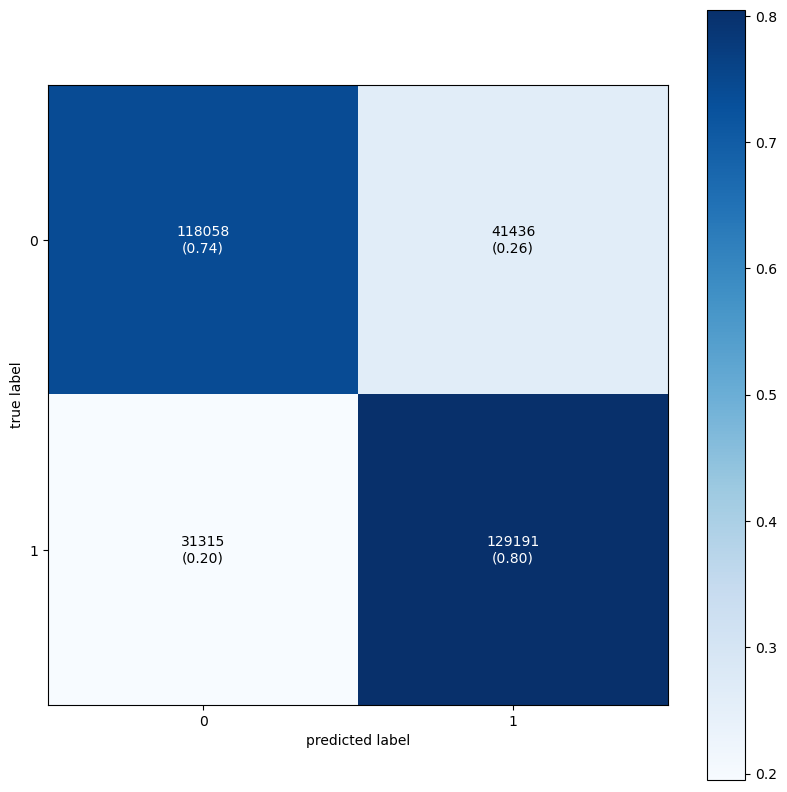

In [45]:
# Print confusion matrix
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
print('\n')
print("confusion matrix")
print('\n')
CR=confusion_matrix(y_test, y_pred)

fig, ax = plot_confusion_matrix(conf_mat=CR,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

In [46]:
import pickle

In [47]:
with open('svm_model.pkl', 'wb') as f:
    pickle.dump(svm_model, f)

In [48]:
df.head()

,label,text,sentiment_label,final_clean_text
0,0,"[upset, cant, update, facebok, texting, it, mi...",negative,upset cant update facebok texting it might cry...
1,0,"[kenichan, dived, many, time, bal, managed, sa...",negative,kenichan dived many time bal managed save rest...
2,0,"[whole, body, fels, itchy, like, fire]",negative,whole body fels itchy like fire
3,0,"[nationwideclas, no, behaving, al, im, mad, he...",negative,nationwideclas no behaving al im mad here cant...
4,0,"[kwesidei, whole, crew]",negative,kwesidei whole crew


In [49]:
new_data = pd.read_csv("D:/4th year/Grad Project/Datasets/General/Twitter_Data.csv")

In [51]:
new_data.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [53]:
new_data = new_data.dropna(subset=['clean_text'])

In [54]:
average_value = new_data['category'].mean()

# Replace null values with the calculated average
new_data['category'].fillna(average_value, inplace=True)

In [56]:
new_data.isnull().sum()

clean_text    0
category      0
dtype: int64

In [57]:
# Function to map float sentiment scores to string labels
def map_sentiment(score):
    if score <= 0:
        return 'negative'
    else:
        return 'positive'

# Apply the mapping function to the 'sentiment_score' column
new_data['sentiment_label'] = new_data['category'].apply(map_sentiment)

# Display the updated DataFrame
print(new_data[['category', 'sentiment_label']])


        category sentiment_label
0           -1.0        negative
1            0.0        negative
2            1.0        positive
3            1.0        positive
4            1.0        positive
...          ...             ...
162975      -1.0        negative
162976      -1.0        negative
162977       0.0        negative
162978       0.0        negative
162979       1.0        positive

[162976 rows x 2 columns]


In [58]:
new_data.head()

,clean_text,category,sentiment_label
0,when modi promised “minimum government maximum...,-1.0,negative
1,talk all the nonsense and continue all the dra...,0.0,negative
2,what did just say vote for modi welcome bjp t...,1.0,positive
3,asking his supporters prefix chowkidar their n...,1.0,positive
4,answer who among these the most powerful world...,1.0,positive


In [61]:
new_data['clean_text']=new_data['clean_text'].str.lower()

In [62]:
# Download the 'stopwords' resource
nltk.download('stopwords')

# Load the stopwords list for English
stopwords_list = stopwords.words('english')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\10\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [63]:
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [64]:
STOPWORDS = set(stopwords.words('english'))
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
new_data['clean_text'] = new_data['clean_text'].apply(lambda text: cleaning_stopwords(text))
new_data['clean_text'].head()

0    modi promised “minimum government maximum gove...
1               talk nonsense continue drama vote modi
2    say vote modi welcome bjp told rahul main camp...
3    asking supporters prefix chowkidar names modi ...
4    answer among powerful world leader today trump...
Name: clean_text, dtype: object

In [65]:
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)

In [66]:
new_data['clean_text']= new_data['clean_text'].apply(lambda x: cleaning_punctuations(x))
new_data['clean_text'].tail()

162975    456 crores paid neerav modi recovered congress...
162976    dear rss terrorist payal gawar modi killing 10...
162977                         cover interaction forum left
162978    big project came india modi dream project happ...
162979    ever listen like gurukul discipline maintained...
Name: clean_text, dtype: object

In [67]:
def cleaning_repeating_char(text):
    return re.sub(r'(.)\1+', r'\1', text)

In [68]:
new_data['clean_text'] = new_data['clean_text'].apply(lambda x: cleaning_repeating_char(x))
new_data['clean_text'].tail()

162975    456 crores paid nerav modi recovered congres l...
162976    dear rs terorist payal gawar modi kiling 10 pl...
162977                         cover interaction forum left
162978    big project came india modi dream project hape...
162979    ever listen like gurukul discipline maintained...
Name: clean_text, dtype: object

In [69]:
def cleaning_email(data):
    return re.sub('@[^\s]+', ' ', data)

In [70]:
new_data['clean_text']= new_data['clean_text'].apply(lambda x: cleaning_email(x))
new_data['clean_text'].tail()

162975    456 crores paid nerav modi recovered congres l...
162976    dear rs terorist payal gawar modi kiling 10 pl...
162977                         cover interaction forum left
162978    big project came india modi dream project hape...
162979    ever listen like gurukul discipline maintained...
Name: clean_text, dtype: object

In [71]:
def cleaning_URLs(data):
    return re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',data)

In [72]:
new_data['clean_text'] = new_data['clean_text'].apply(lambda x: cleaning_URLs(x))
new_data['clean_text'].tail()

162975    456 crores paid nerav modi recovered congres l...
162976    dear rs terorist payal gawar modi kiling 10 pl...
162977                         cover interaction forum left
162978    big project came india modi dream project hape...
162979    ever listen like gurukul discipline maintained...
Name: clean_text, dtype: object

In [73]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)

In [74]:
new_data['clean_text'] = new_data['clean_text'].apply(lambda x: cleaning_numbers(x))
new_data['clean_text'].tail()

162975     crores paid nerav modi recovered congres lead...
162976    dear rs terorist payal gawar modi kiling  plus...
162977                         cover interaction forum left
162978    big project came india modi dream project hape...
162979    ever listen like gurukul discipline maintained...
Name: clean_text, dtype: object

In [75]:
tokenizer = RegexpTokenizer(r'\w+')
new_data['clean_text'] = new_data['clean_text'].apply(tokenizer.tokenize)

In [76]:
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data

new_data['clean_text']= new_data['clean_text'].apply(lambda x: stemming_on_text(x))

In [77]:
import nltk
from nltk.stem import WordNetLemmatizer

# Download the 'wordnet' resource
nltk.download('wordnet')

# Create WordNetLemmatizer
lm = WordNetLemmatizer()

# Define lemmatizer function
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return text

# Apply lemmatizer function to the 'text' column in the 'data' DataFrame
new_data['clean_text'] = new_data['clean_text'].apply(lambda x: lemmatizer_on_text(x))


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\10\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [81]:
# Assuming your CSV file has 'text' column for reviews and 'sentiment' column for labels
X_new = new_data['clean_text']
y_new = new_data['sentiment_label']

In [82]:
max_len = 500
tok = Tokenizer(num_words=2000)
tok.fit_on_texts(X_new)
sequences = tok.texts_to_sequences(X_new)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [84]:
# Iterate over each row and concatenate values in 'your_column' with spaces
result_list = []
for index, row in new_data.iterrows():
    row_values = row['clean_text']
    result_list.append(' '.join(map(str, row_values)))

# Add the result_list as a new column in the DataFrame
new_data['final_clean_text'] = result_list

new_data.head()

,clean_text,category,sentiment_label,final_clean_text
0,"[modi, promised, minimum, government, maximum,...",-1.0,negative,modi promised minimum government maximum gover...
1,"[talk, nonsense, continue, drama, vote, modi]",0.0,negative,talk nonsense continue drama vote modi
2,"[say, vote, modi, welcome, bjp, told, rahul, m...",1.0,positive,say vote modi welcome bjp told rahul main camp...
3,"[asking, suporters, prefix, chowkidar, name, m...",1.0,positive,asking suporters prefix chowkidar name modi gr...
4,"[answer, among, powerful, world, leader, today...",1.0,positive,answer among powerful world leader today trump...


In [98]:
new_data.head()

,clean_text,category,sentiment_label,final_clean_text
0,"[modi, promised, minimum, government, maximum,...",-1.0,negative,modi promised minimum government maximum gover...
1,"[talk, nonsense, continue, drama, vote, modi]",0.0,negative,talk nonsense continue drama vote modi
2,"[say, vote, modi, welcome, bjp, told, rahul, m...",1.0,positive,say vote modi welcome bjp told rahul main camp...
3,"[asking, suporters, prefix, chowkidar, name, m...",1.0,positive,asking suporters prefix chowkidar name modi gr...
4,"[answer, among, powerful, world, leader, today...",1.0,positive,answer among powerful world leader today trump...


In [99]:
X_new = new_data['final_clean_text']  # Assuming 'label' is the name of the target variable
y_new = new_data['sentiment_label']

In [100]:
vectorizer = TfidfVectorizer(max_features=5000)  # Adjust max_features as needed
X_new = vectorizer.fit_transform(X_new)

In [101]:
# Split the dataset into training and testing sets
X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X_new, y_new, test_size=0.2, random_state=42)

In [ ]:
y_new_pred = svm_model.predict(X_new_test)

In [ ]:
accuracy_new = accuracy_score(y_new_test, y_pred_new)
print("Accuracy on new dataset:", accuracy_new)